<a href="https://colab.research.google.com/github/karlosbcv/Telecom-X-2/blob/main/desafio_telecomx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📝 Notebook: Análisis y Predicción de Churn

In [63]:
# --- 🧩 1. IMPORTACIÓN DE LIBRERÍAS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

# Configuración general
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [72]:
# --- 📦 2. CARGA Y LIMPIEZA DE DATOS ---
df = pd.read_csv("https://raw.githubusercontent.com/karlosbcv/Telecom-X-2/refs/heads/main/datos_depurados.csv")

# Verifica los valores faltantes
print(df.isnull().sum())

# Eliminar registros sin 'Churn'
df = df[df['Churn'].notna()]

# Imputar valores faltantes en 'Charges Total'
df['Charges Total'] = df['Charges Total'].fillna(df['Charges Total'].median())

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges Monthly       0
Charges Total        11
Churn_numeric         0
Cuentas_Diarias       0
dtype: int64


In [73]:
# --- 🔧 3. CODIFIACCION Y PREPARACIÓN DE VARIABLES ---

# Usamos 'Churn_numeric' como variable objetivo
df_model = df.drop(['Churn'], axis=1)

# One-hot encoding para variables categóricas
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Separar variables predictoras y objetivo
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']

# Estandarización de variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [60]:
# --- 🎯 4. SEPARACIÓN DE DATOS ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

In [61]:
# --- 📈 5. REGRESIÓN LOGÍSTICA

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

# Predicción y evaluación
y_pred = model_lr.predict(X_test)
print(classification_report(y_test, y_pred))

# Coeficientes
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model_lr.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

# Mostrar top variables influyentes
print(coeff_df.head(10))



              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1035
           1       0.58      0.67      0.62       374

    accuracy                           0.78      1409
   macro avg       0.73      0.75      0.74      1409
weighted avg       0.80      0.78      0.79      1409

                             Feature  Importance
1                             tenure   -0.678096
7053     InternetService_Fiber optic    0.502532
3                      Charges Total   -0.476553
7071  PaymentMethod_Electronic check    0.469726
7068               Contract_Two year   -0.466182
7067               Contract_One year   -0.422410
7062                 TechSupport_Yes   -0.399447
7056              OnlineSecurity_Yes   -0.353327
7069            PaperlessBilling_Yes    0.265544
7058                OnlineBackup_Yes   -0.246826


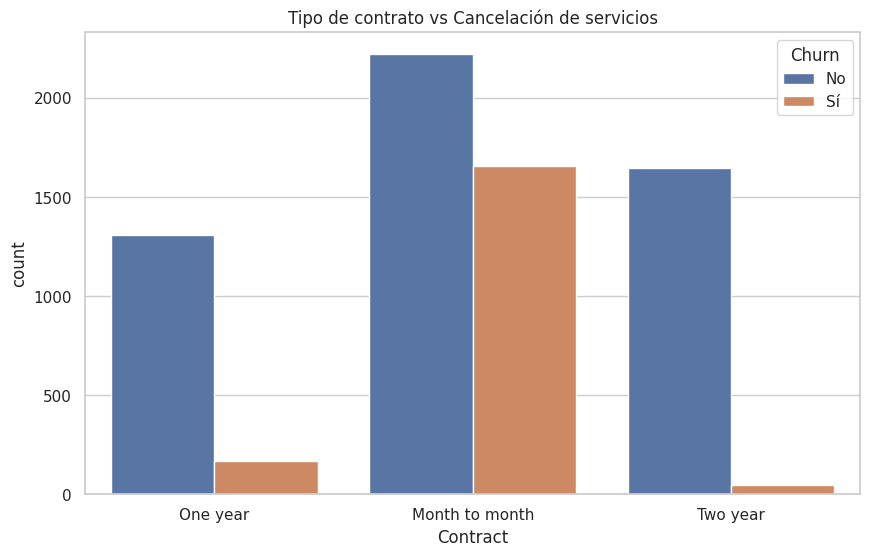

In [74]:
# --- 🔍 6. GRÁFICOS EXPLORATORIOS ---

# 1. Tipo de contrato vs Churn
sns.countplot(x='Contract', hue='Churn_numeric', data=df)
plt.title("Tipo de contrato vs Cancelación de servicios")
plt.legend(title="Churn", labels=["No", "Sí"])
plt.show()



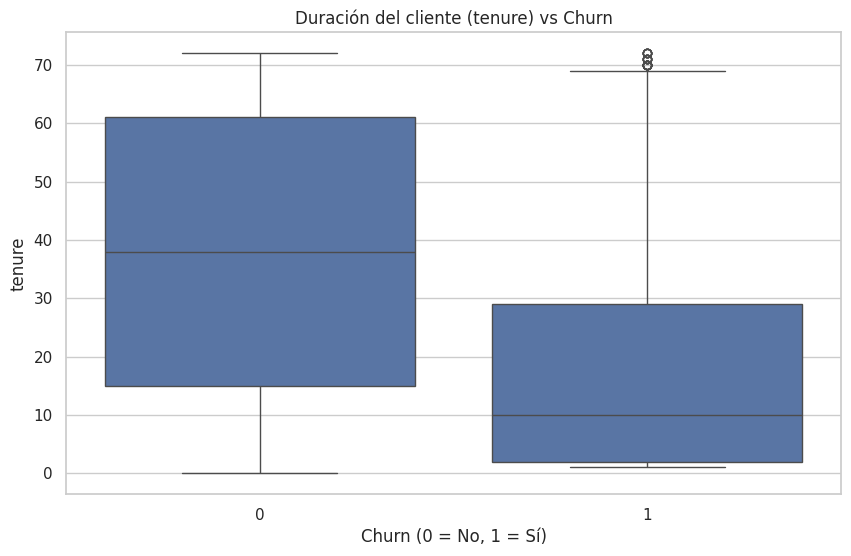

In [18]:
# 2. Tenure vs Churn
sns.boxplot(x='Churn_numeric', y='tenure', data=df)
plt.title("Duración del cliente (tenure) vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.show()



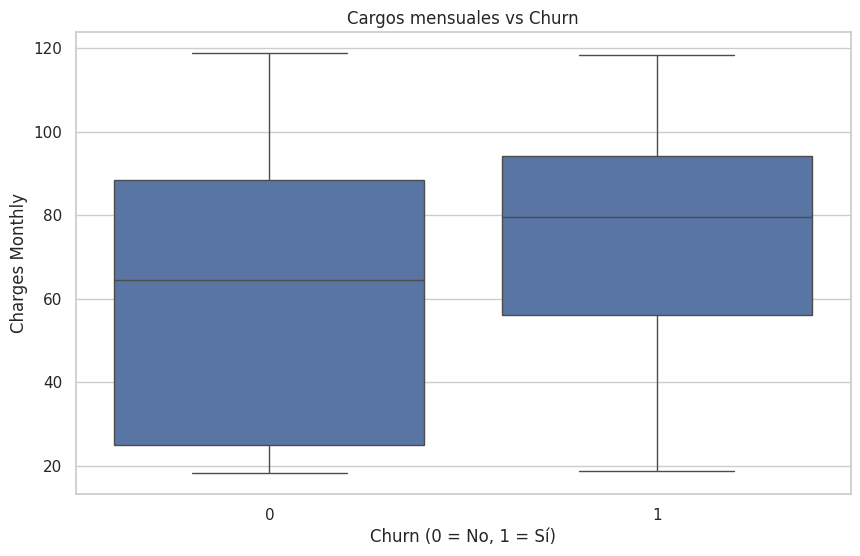

In [21]:
# 3. Cargo mensual vs Churn
sns.boxplot(x='Churn_numeric', y='Charges Monthly', data=df)
plt.title("Cargos mensuales vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.show()



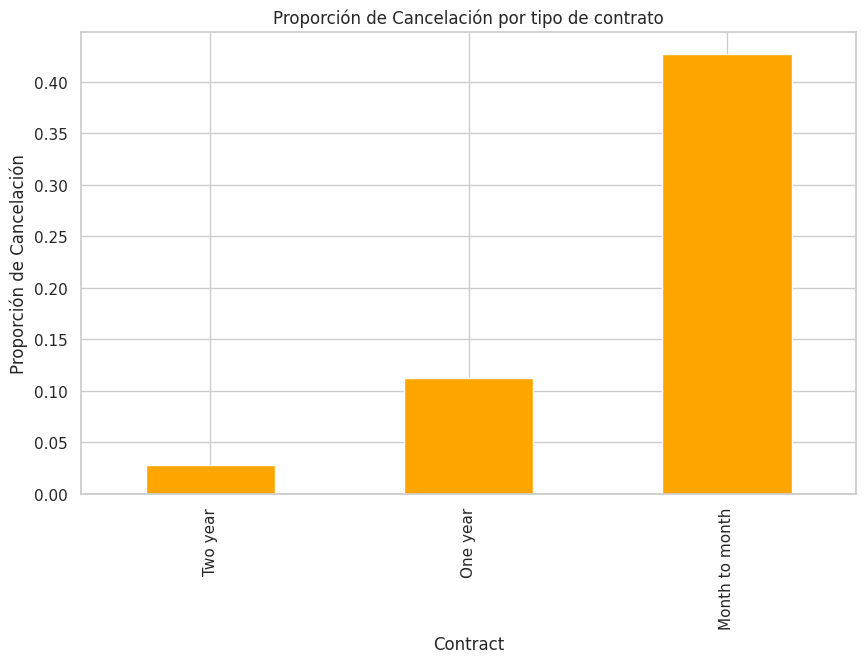

Random Forest - Accuracy: 0.7913
Gradient Boosting - Accuracy: 0.7906


In [24]:
# 4. Proporción de Cancelación (churn)  por tipo de contrato
contract_churn = df.groupby('Contract')['Churn_numeric'].mean().sort_values()
contract_churn.plot(kind='bar', color='orange')
plt.title("Proporción de Cancelación por tipo de contrato")
plt.ylabel("Proporción de Cancelación")
plt.show()

# --- 🤖 7. COMPARACIÓN CON OTROS MODELOS ---

models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} - Accuracy: {acc:.4f}")

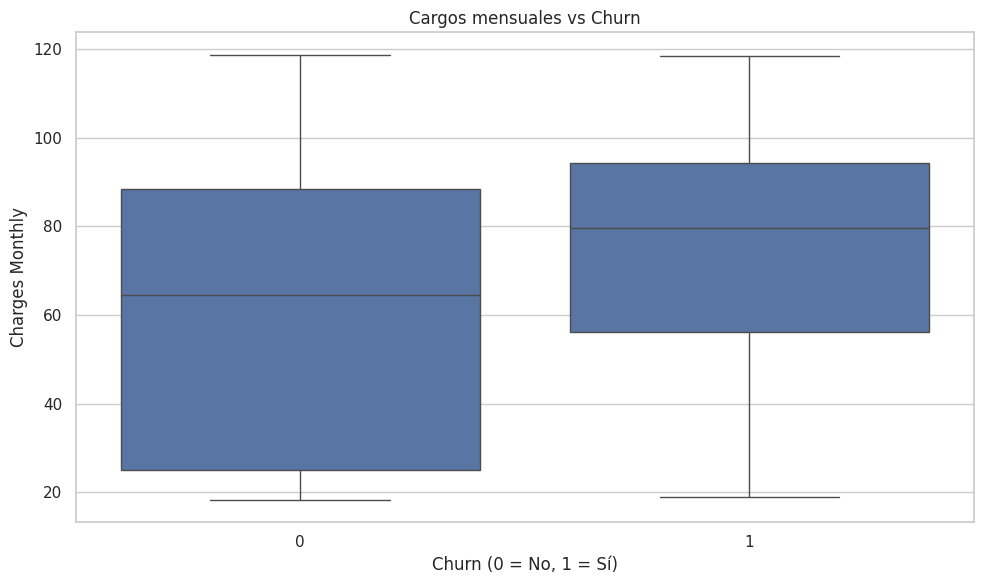

In [29]:
# 3. Cargos mensuales vs Churn
sns.boxplot(x='Churn_numeric', y='Charges Monthly', data=df)
plt.title("Cargos mensuales vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.tight_layout()
plt.show()

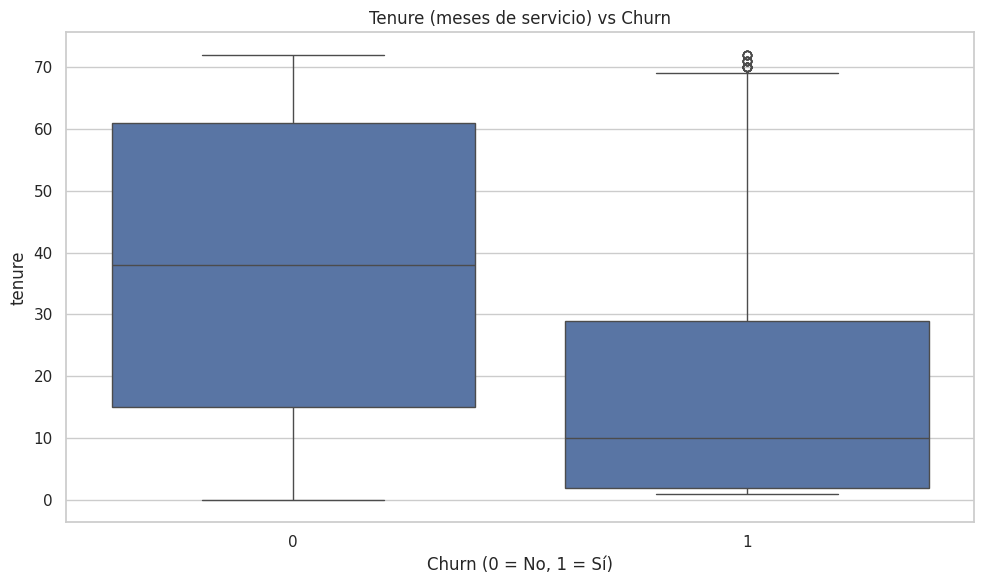

In [32]:
# 2. Tenure vs Churn (boxplot)
sns.boxplot(x='Churn_numeric', y='tenure', data=df)
plt.title("Tenure (meses de servicio) vs Churn")
plt.xlabel("Churn (0 = No, 1 = Sí)")
plt.tight_layout()
plt.show()

In [35]:
# --- PREPARACIÓN DE DATOS ---

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Codificación
df_model = df.drop(['Churn'], axis=1)
df_encoded = pd.get_dummies(df_model, drop_first=True)

X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']

# División
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [39]:
# REGRESIÓN LOGÍSTICA
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# ÁRBOL DE DECISIÓN
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Árbol de Decisión:\n")
print(classification_report(y_test, y_pred_tree))

Árbol de Decisión:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.53      0.57       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [56]:
import plotly.express as px

fig = px.bar(feat_top.sort_values(by='Importancia'),
             x='Importancia', y='Variable', orientation='h',
             title='Importancia de variables - Random Forest',
             color='Importancia', color_continuous_scale='Blues')

fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.write_html('/content/random_forest.html')
fig.show()
